In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [47]:
df=pd.read_csv('data.csv')
df

,Company,Date,Close/Last,Volume,Open,High,Low
0,AAPL,07/17/2023,$193.99,50520160,$191.90,$194.32,$191.81
1,AAPL,07/14/2023,$190.69,41616240,$190.23,$191.1799,$189.63
2,AAPL,07/13/2023,$190.54,41342340,$190.50,$191.19,$189.78
3,AAPL,07-12-2023,$189.77,60750250,$189.68,$191.70,$188.47
4,AAPL,07-11-2023,$188.08,46638120,$189.16,$189.30,$186.60
...,...,...,...,...,...,...,...
25155,NFLX,07/24/2013,$34.4714,33395351,$35.6743,$36.0357,$34.3143
25156,NFLX,07/23/2013,$35.7514,76792963,$35.9143,$37.4621,$35.1714
25157,NFLX,07/22/2013,$37.4228,44791095,$38.1214,$38.3928,$36.7314
25158,NFLX,07/19/2013,$37.7966,18098750,$38.2043,$38.2784,$37.5971


In [48]:
df.dtypes

Company       object
Date          object
Close/Last    object
Volume         int64
Open          object
High          object
Low           object
dtype: object

In [49]:
df.isnull().sum()

Company       0
Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64

In [50]:
company_name = df['Company'].unique().tolist()
company_name

['AAPL', 'SBUX', 'MSFT', 'CSCO', 'QCOM', 'META', 'AMZN', 'TSLA', 'AMD', 'NFLX']

In [51]:
def remove_symbol(cols):
    for col in cols:
        df[col] = df[col].str.replace('$', '', regex=True).astype('float64')
    return df

remove_list = ['Close/Last', 'Open', 'High', 'Low']
remove_symbol(remove_list)

,Company,Date,Close/Last,Volume,Open,High,Low
0,AAPL,07/17/2023,193.9900,50520160,191.9000,194.3200,191.8100
1,AAPL,07/14/2023,190.6900,41616240,190.2300,191.1799,189.6300
2,AAPL,07/13/2023,190.5400,41342340,190.5000,191.1900,189.7800
3,AAPL,07-12-2023,189.7700,60750250,189.6800,191.7000,188.4700
4,AAPL,07-11-2023,188.0800,46638120,189.1600,189.3000,186.6000
...,...,...,...,...,...,...,...
25155,NFLX,07/24/2013,34.4714,33395351,35.6743,36.0357,34.3143
25156,NFLX,07/23/2013,35.7514,76792963,35.9143,37.4621,35.1714
25157,NFLX,07/22/2013,37.4228,44791095,38.1214,38.3928,36.7314
25158,NFLX,07/19/2013,37.7966,18098750,38.2043,38.2784,37.5971


In [52]:
df.dtypes

Company        object
Date           object
Close/Last    float64
Volume          int64
Open          float64
High          float64
Low           float64
dtype: object

In [53]:
ra = np.random.randint(df['Volume'])
ra

array([35918637, 24813081, 12871581, ...,  3991468,  8527130, 17011637])

In [54]:
ra = ra.reshape(-1, 1)

In [55]:
MS = MinMaxScaler()
normalized_array = MS.fit_transform(ra)

In [56]:
normalized_array.flatten()

array([0.05448692, 0.03763934, 0.0195236 , ..., 0.0060521 , 0.01293289,
       0.02580423])

In [57]:
SS = StandardScaler()
standardized_array = SS.fit_transform(ra)

In [58]:
standardized_array.flatten()

array([ 0.25787233, -0.02110895, -0.32108987, ..., -0.54416607,
       -0.43022628, -0.21708804])

In [59]:
standardized_array[0].mean(), standardized_array[0].std() 

(0.2578723326947705, 0.0)

In [60]:
standardized_array[1].mean(), standardized_array[1].std()

(-0.02110894606305439, 0.0)

In [61]:
from sklearn.impute import SimpleImputer, KNNImputer
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [62]:
df.head()

,Company,Date,Close/Last,Volume,Open,High,Low
0,AAPL,07/17/2023,193.99,50520160,191.90,194.3200,191.81
1,AAPL,07/14/2023,190.69,41616240,190.23,191.1799,189.63
2,AAPL,07/13/2023,190.54,41342340,190.50,191.1900,189.78
3,AAPL,07-12-2023,189.77,60750250,189.68,191.7000,188.47
4,AAPL,07-11-2023,188.08,46638120,189.16,189.3000,186.60


In [63]:
X = df.drop('Company', axis=1)

In [64]:
X

,Date,Close/Last,Volume,Open,High,Low
0,07/17/2023,193.9900,50520160,191.9000,194.3200,191.8100
1,07/14/2023,190.6900,41616240,190.2300,191.1799,189.6300
2,07/13/2023,190.5400,41342340,190.5000,191.1900,189.7800
3,07-12-2023,189.7700,60750250,189.6800,191.7000,188.4700
4,07-11-2023,188.0800,46638120,189.1600,189.3000,186.6000
...,...,...,...,...,...,...
25155,07/24/2013,34.4714,33395351,35.6743,36.0357,34.3143
25156,07/23/2013,35.7514,76792963,35.9143,37.4621,35.1714
25157,07/22/2013,37.4228,44791095,38.1214,38.3928,36.7314
25158,07/19/2013,37.7966,18098750,38.2043,38.2784,37.5971


In [65]:
numeric_features = ['Company']
categorical_features = ['Volume', 'Open']

In [66]:
numeric_transformer = Pipeline(
    steps = [
        ('imputation', SimpleImputer(strategy='median')),
        ('scaling', StandardScaler())
    ]
)

In [67]:
categorical_transformer = Pipeline(
    steps = [
        ('imputation', SimpleImputer(strategy='most_frequent')),
        ('encoding', OneHotEncoder(handle_unknown='ignore'))
    ]
)

In [68]:
transformer = ColumnTransformer(
    transformers = [
        ('numeric_transformations', numeric_transformer, numeric_features),
        ('categorical_transformations', categorical_transformer, categorical_features)
    ]
)

In [69]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [70]:
oldest_date_stock_price = df['Close/Last'][(df['Date']==min(df['Date'])) & (df['Company']=='AAPL')].values[0]
lastest_date_stock_price = df['Close/Last'][(df['Date']==max(df['Date'])) & (df['Company']=='AAPL')].values[0]
difference = lastest_date_stock_price - oldest_date_stock_price


def stock_price_rise():

    stock_rise = {}
    company_name = df['Company'].unique().tolist()

    for ticker in company_name:
        oldest_date_stock_price = df['Close/Last'][(df['Date']==min(df['Date'])) & (df['Company']==ticker)].values[0]
        lastest_date_stock_price = df['Close/Last'][(df['Date']==max(df['Date'])) & (df['Company']==ticker)].values[0]
        difference = lastest_date_stock_price - oldest_date_stock_price
        stock_rise[ticker] = difference

    return stock_rise

stock_price_raise = stock_price_rise()
stock_price_raise

{'AAPL': 157.81529999999998,
 'SBUX': 78.38499999999999,
 'MSFT': 299.15999999999997,
 'CSCO': 41.37,
 'QCOM': 109.55000000000001,
 'META': 281.64000000000004,
 'AMZN': 146.81850000000003,
 'TSLA': 342.25329999999997,
 'AMD': 139.95000000000002,
 'NFLX': 550.6086}

In [71]:
stock_price_diff = pd.DataFrame(list(stock_price_raise.items()),
                                columns=['Company', 'Close/Last'])
stock_price_diff = stock_price_diff.sort_values(by=['Close/Last'], ascending=False)
stock_price_diff

,Company,Close/Last
9,NFLX,550.6086
7,TSLA,342.2533
2,MSFT,299.1600
5,META,281.6400
0,AAPL,157.8153
6,AMZN,146.8185
8,AMD,139.9500
4,QCOM,109.5500
1,SBUX,78.3850
3,CSCO,41.3700


[Text(0.5, 1.0, 'Stock Price Difference Between 2013-07-18 and 2023-07-17')]

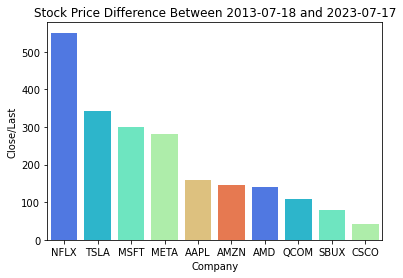

In [72]:
colors = sns.color_palette("rainbow")
sns.barplot(x='Company',
            y='Close/Last',
            palette=colors,
            data=stock_price_diff).set(title='Stock Price Difference Between 2013-07-18 and 2023-07-17')

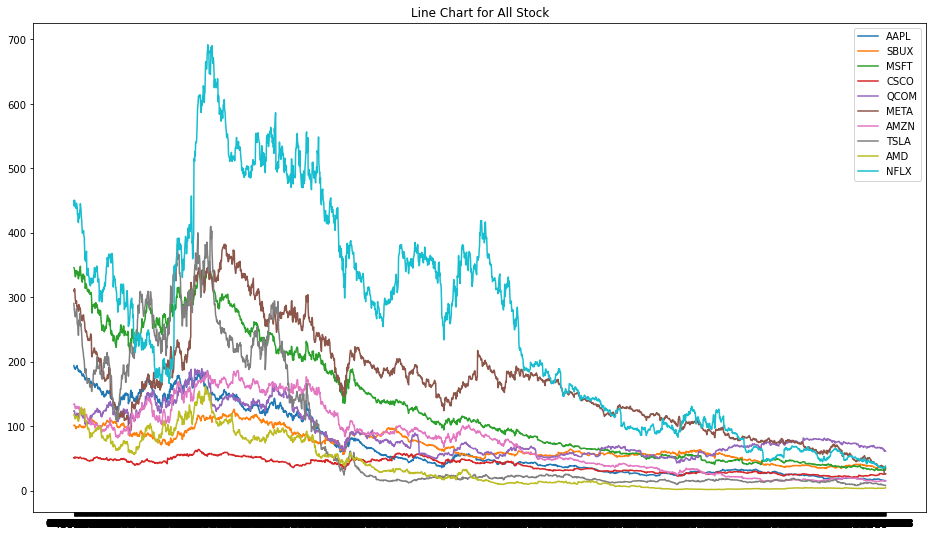

In [73]:
plt.figure(figsize=(16,9))

for company in company_name:
    plt.plot(df[df['Company']==company]['Date'], df[df['Company']==company]['Close/Last'])

plt.title('Line Chart for All Stock')
plt.legend(company_name)

In [74]:
df.groupby('Company').mean().sort_values(by=['Volume'], ascending=False)

,Close/Last,Volume,Open,High,Low
Company,,,,,
AAPL,70.294163,1.494464e+08,70.232917,71.020345,69.495501
TSLA,83.265228,1.152436e+08,83.282714,85.205097,81.263506
AMZN,78.827081,8.006377e+07,78.857564,79.774733,77.850298
AMD,38.069080,5.341410e+07,38.067611,38.857642,37.251372
MSFT,135.610791,3.113659e+07,135.552904,136.923749,134.152655
META,165.724114,2.871386e+07,165.628444,167.769054,163.575721
CSCO,39.090075,2.439770e+07,39.076253,39.430352,38.727041
NFLX,256.768639,1.123296e+07,256.724742,260.699942,252.602322
QCOM,86.945386,1.075900e+07,86.934609,88.015644,85.851069


In [75]:
temp_corr_df =df[['Company', 'Close/Last', 'Date']]
temp_corr_df

,Company,Close/Last,Date
0,AAPL,193.9900,07/17/2023
1,AAPL,190.6900,07/14/2023
2,AAPL,190.5400,07/13/2023
3,AAPL,189.7700,07-12-2023
4,AAPL,188.0800,07-11-2023
...,...,...,...
25155,NFLX,34.4714,07/24/2013
25156,NFLX,35.7514,07/23/2013
25157,NFLX,37.4228,07/22/2013
25158,NFLX,37.7966,07/19/2013


In [76]:
temp_corr_df.Company.value_counts()

AAPL    2516
SBUX    2516
MSFT    2516
CSCO    2516
QCOM    2516
META    2516
AMZN    2516
TSLA    2516
AMD     2516
NFLX    2516
Name: Company, dtype: int64

In [77]:
def company_stock_price(df):
    stocks = {}
    for company in df['Company'].unique():
        stocks[company] = df[df['Company']==company]['Close/Last'].values.tolist()
    return stocks

stocks_price = company_stock_price(temp_corr_df)

In [78]:
corr_df = pd.DataFrame(stocks_price,
                       index=temp_corr_df['Date'].unique())

corr_df = corr_df.corr(method='pearson')
corr_df

,AAPL,SBUX,MSFT,CSCO,QCOM,META,AMZN,TSLA,AMD,NFLX
AAPL,1.000000,0.861332,0.983015,0.751294,0.908325,0.746964,0.862163,0.942042,0.967910,0.729919
SBUX,0.861332,1.000000,0.902432,0.843926,0.770480,0.853233,0.881124,0.774729,0.871355,0.841024
MSFT,0.983015,0.902432,1.000000,0.827709,0.887016,0.816639,0.912394,0.915051,0.979730,0.809420
CSCO,0.751294,0.843926,0.827709,1.000000,0.627339,0.822352,0.868330,0.640898,0.774638,0.866982
QCOM,0.908325,0.770480,0.887016,0.627339,1.000000,0.682379,0.802181,0.937833,0.928158,0.662114
META,0.746964,0.853233,0.816639,0.822352,0.682379,1.000000,0.920295,0.692233,0.814296,0.925753
AMZN,0.862163,0.881124,0.912394,0.868330,0.802181,0.920295,1.000000,0.805408,0.902728,0.941439
TSLA,0.942042,0.774729,0.915051,0.640898,0.937833,0.692233,0.805408,1.000000,0.937498,0.654822
AMD,0.967910,0.871355,0.979730,0.774638,0.928158,0.814296,0.902728,0.937498,1.000000,0.801663
NFLX,0.729919,0.841024,0.809420,0.866982,0.662114,0.925753,0.941439,0.654822,0.801663,1.000000


<Figure size 432x288 with 0 Axes>

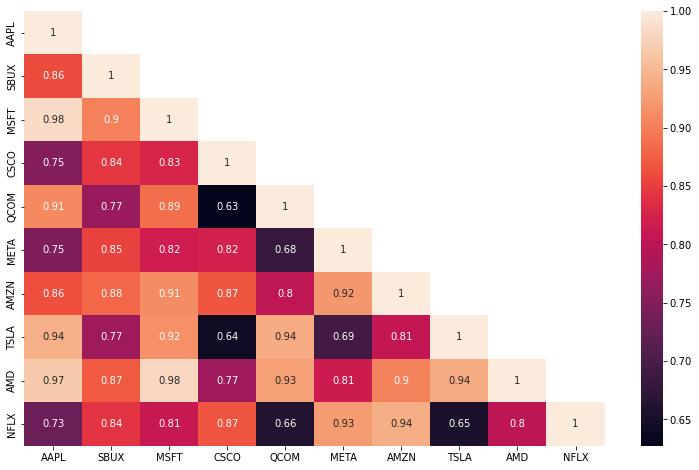

<Figure size 432x288 with 0 Axes>

In [79]:
plt.figure(figsize=(13, 8))
sns.heatmap(corr_df, annot=True, mask=np.tril(corr_df)==0)
plt.figure()

In [80]:
corr_df[corr_df <= 0.8] = 0
corr_df

,AAPL,SBUX,MSFT,CSCO,QCOM,META,AMZN,TSLA,AMD,NFLX
AAPL,1.000000,0.861332,0.983015,0.000000,0.908325,0.000000,0.862163,0.942042,0.967910,0.000000
SBUX,0.861332,1.000000,0.902432,0.843926,0.000000,0.853233,0.881124,0.000000,0.871355,0.841024
MSFT,0.983015,0.902432,1.000000,0.827709,0.887016,0.816639,0.912394,0.915051,0.979730,0.809420
CSCO,0.000000,0.843926,0.827709,1.000000,0.000000,0.822352,0.868330,0.000000,0.000000,0.866982
QCOM,0.908325,0.000000,0.887016,0.000000,1.000000,0.000000,0.802181,0.937833,0.928158,0.000000
META,0.000000,0.853233,0.816639,0.822352,0.000000,1.000000,0.920295,0.000000,0.814296,0.925753
AMZN,0.862163,0.881124,0.912394,0.868330,0.802181,0.920295,1.000000,0.805408,0.902728,0.941439
TSLA,0.942042,0.000000,0.915051,0.000000,0.937833,0.000000,0.805408,1.000000,0.937498,0.000000
AMD,0.967910,0.871355,0.979730,0.000000,0.928158,0.814296,0.902728,0.937498,1.000000,0.801663
NFLX,0.000000,0.841024,0.809420,0.866982,0.000000,0.925753,0.941439,0.000000,0.801663,1.000000


<Figure size 432x288 with 0 Axes>

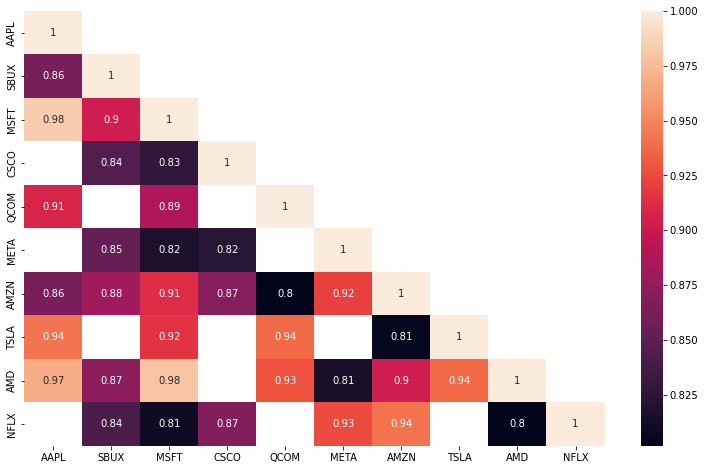

<Figure size 432x288 with 0 Axes>

In [81]:
plt.figure(figsize=(13, 8))
sns.heatmap(corr_df, annot=True, mask=((corr_df==0) | (np.tril(corr_df)==0)))
plt.figure()

In [83]:
average_prices = df.groupby('Company')['Close/Last'].mean()
average_volumes = df.groupby('Company')['Volume'].mean()
# Creating DataFrames for average stock prices and average trading volumes
average_prices_df = pd.DataFrame({'Average Stock Price': average_prices})
average_volumes_df = pd.DataFrame({'Average Trading Volume': average_volumes})


result_table = pd.concat([average_prices_df, average_volumes_df], axis=1)
print(result_table)

         Average Stock Price  Average Trading Volume
Company                                             
AAPL               70.294163            1.494464e+08
AMD                38.069080            5.341410e+07
AMZN               78.827081            8.006377e+07
CSCO               39.090075            2.439770e+07
META              165.724114            2.871386e+07
MSFT              135.610791            3.113659e+07
NFLX              256.768639            1.123296e+07
QCOM               86.945386            1.075900e+07
SBUX               69.964221            8.768385e+06
TSLA               83.265228            1.152436e+08


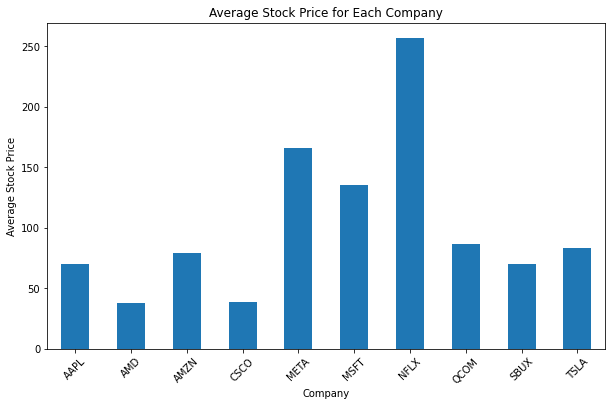

In [85]:
plt.figure(figsize=(10, 6))
average_prices.plot(kind='bar')
plt.title('Average Stock Price for Each Company')
plt.xlabel('Company')
plt.ylabel('Average Stock Price')
plt.xticks(rotation=45)
plt.show()

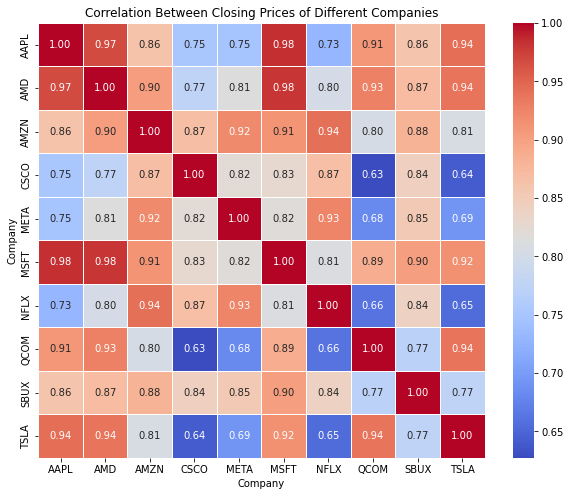

In [86]:
correlation_matrix = df.pivot_table(index='Date', columns='Company', values='Close/Last', aggfunc='mean').corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Between Closing Prices of Different Companies')
plt.xlabel('Company')
plt.ylabel('Company')
plt.show()

In [87]:
df['Price_Growth'] = df.groupby('Company')['Close/Last'].pct_change() * 100

df['Total_Volume'] = df.groupby('Company')['Volume'].transform('sum')

top_performers_price = df.groupby('Company')['Price_Growth'].mean().nlargest(5)

top_performers_volume = df.groupby('Company')['Total_Volume'].mean().nlargest(5)

top_performers_price_df = pd.DataFrame({'Top Performers (Price Growth)': top_performers_price.index, 'Average Price Growth': top_performers_price.values})
top_performers_volume_df = pd.DataFrame({'Top Performers (Trading Volume)': top_performers_volume.index, 'Average Trading Volume': top_performers_volume.values})

result_table = pd.concat([top_performers_price_df, top_performers_volume_df], axis=1)

print(result_table)

  Top Performers (Price Growth)  Average Price Growth  \
0                          QCOM             -0.003706   
1                          CSCO             -0.014164   
2                          SBUX             -0.029417   
3                          NFLX             -0.056923   
4                           AMD             -0.063900   

  Top Performers (Trading Volume)  Average Trading Volume  
0                            AAPL            3.760073e+11  
1                            TSLA            2.899529e+11  
2                            AMZN            2.014404e+11  
3                             AMD            1.343899e+11  
4                            MSFT            7.833965e+10  


In [88]:
volatility_df = df.groupby('Company')['Close/Last'].std()


sorted_volatility_df = volatility_df.sort_values(ascending=False)


print(sorted_volatility_df)

Company
NFLX    168.759861
TSLA    104.487703
MSFT     94.808841
META     79.822152
AAPL     52.459923
AMZN     51.854820
AMD      39.991063
QCOM     34.979906
SBUX     23.795273
CSCO     11.089336
Name: Close/Last, dtype: float64
